## 지수 병합

In [48]:
import pandas as pd

pd.set_option('display.max_columns', None)

cpi_df = pd.read_csv('./data/소비자물가지수.csv', encoding='CP949')
rsi_df = pd.read_csv('./data/소매판매지수.csv')
mir_df = pd.read_csv('./data/시장금리.csv', encoding='CP949')

### 소비자물가지수 전처리

In [38]:
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      116 non-null    float64
 1   전국      116 non-null    float64
dtypes: float64(2)
memory usage: 1.9 KB


In [39]:
cpi_df["시점"] = cpi_df["시점"].astype(str)                                                                 # 데이터 타입 str로 변경
cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"   # 10월이 .1로 입력돼있기 때문에 0을 붙여준다.
cpi_df["시점"] = pd.to_datetime(cpi_df["시점"], format='%Y.%m')                                             # 데이터 타입 datetime으로 변경
cpi_df["시점"] = cpi_df["시점"].dt.strftime('%Y%m')                                                         # datetime 형식 설정
cpi_df.rename(columns={"시점":"날짜"}, inplace=True)                                                       # 컬럼명 변경
cpi_df.rename(columns={"전국":"소비자물가지수"}, inplace=True)                                              # 컬럼명 변경
cpi_df.set_index("날짜", inplace=True)                                                                     # 날짜 컬럼 인덱스 설정
# cpi_df = cpi_df.iloc[:-4]
cpi_df

C:\Users\wndgj\AppData\Local\Temp\ipykernel_22140\3649105235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"   # 10월이 .1로 입력돼있기 때문에 0을 붙여준다.


,소비자물가지수
날짜,
201211,92.011
201212,92.175
201301,92.728
201302,93.038
201303,92.952
...,...
202202,105.300
202203,106.060
202204,106.850


### 소매판매지수 전처리

In [40]:
rsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   날짜             114 non-null    object 
 1   불변_총지수         114 non-null    float64
 2   불변_총지수(승용차제외)  114 non-null    float64
 3   불변_내구재         114 non-null    float64
 4   불변_준내구재        114 non-null    float64
 5   불변_비내구재        114 non-null    float64
 6   계절_총지수         114 non-null    float64
 7   계절_총지수(승용차제외)  114 non-null    float64
 8   계절_내구재         114 non-null    float64
 9   계절_준내구재        114 non-null    float64
 10  계절_비내구재        114 non-null    float64
 11  불변_인터넷쇼핑       114 non-null    float64
 12  불변_홈쇼핑         114 non-null    float64
 13  불변_방문및배달소매점    114 non-null    float64
dtypes: float64(13), object(1)
memory usage: 12.6+ KB


In [41]:
rsi_df

,날짜,불변_총지수,불변_총지수(승용차제외),불변_내구재,불변_준내구재,불변_비내구재,계절_총지수,계절_총지수(승용차제외),계절_내구재,계절_준내구재,계절_비내구재,불변_인터넷쇼핑,불변_홈쇼핑,불변_방문및배달소매점
0,2012-11,97.5,100.6,91.2,114.3,94.1,94.6,97.3,87.3,100.1,95.5,79.3,103.4,104.1
1,2012-12,99.8,102.8,93.3,116.8,96.6,95.0,97.4,89.4,100.8,95.1,81.2,105.7,100.2
2,2013-01,91.2,94.8,83.3,98.9,92.6,94.4,97.4,84.9,102.8,95.2,75.8,100.5,111.3
3,2013-02,86.8,90.7,78.5,89.7,90.4,94.4,97.1,86.7,102.2,94.6,65.9,83.6,102.5
4,2013-03,93.6,96.9,85.1,106.0,93.4,93.9,96.8,83.6,104.2,94.2,74.3,95.2,108.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2021-12,127.2,125.2,146.5,118.8,121.9,123.2,122.7,138.9,112.0,120.8,370.3,139.1,68.1
110,2022-01,117.5,119.7,120.6,98.5,124.5,120.7,121.1,131.4,108.0,121.3,322.5,133.8,77.0
111,2022-02,107.9,107.1,130.1,88.5,106.0,120.7,119.3,143.7,107.4,115.9,307.4,122.1,63.8
112,2022-03,122.0,119.9,141.3,109.3,118.6,119.9,119.2,133.1,104.3,120.6,334.4,132.1,74.6


In [43]:
rsi_df = rsi_df[["날짜", "불변_총지수"]]
rsi_df["날짜"] = pd.to_datetime(rsi_df["날짜"], format='%Y-%m')     # 데이터 타입 datetime으로 변경
rsi_df["날짜"] = rsi_df["날짜"].dt.strftime('%Y%m')                 # datetime 형식 설정
rsi_df.set_index("날짜", inplace=True)                              # 날짜 컬럼 인덱스 설정
rsi_df.rename(columns={"불변_총지수":"소매판매지수"}, inplace=True)  # 컬럼명 변경
rsi_df = rsi_df.iloc[:-2]
rsi_df

C:\Users\wndgj\AppData\Local\Temp\ipykernel_22140\523271060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rsi_df["날짜"] = pd.to_datetime(rsi_df["날짜"], format='%Y-%m')     # 데이터 타입 datetime으로 변경
C:\Users\wndgj\AppData\Local\Temp\ipykernel_22140\523271060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rsi_df["날짜"] = rsi_df["날짜"].dt.strftime('%Y%m')                 # datetime 형식 설정
C:\Users\wndgj\AppData\Local\Temp\ipykernel_22140\523271060.py:5: SettingWithCopyWarning: 
A value is trying to be set o

,소매판매지수
날짜,
201211,97.5
201212,99.8
201301,91.2
201302,86.8
201303,93.6
...,...
202110,125.0
202111,124.7
202112,127.2


### 시장금리 전처리

In [44]:
mir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Columns: 115 entries, Unnamed: 0 to 202204월
dtypes: float64(114), object(1)
memory usage: 8.2+ KB


In [45]:
mir_df = mir_df.transpose() 
mir_df

,0,1,2,3,4,5,6,7,8
Unnamed: 0,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,NaN,NaN
201211월,2.8,2.87,2.99,3.32,2.85,2.75,2.75,NaN,NaN
201212월,2.85,2.98,3.13,3.3,2.88,2.75,2.75,NaN,NaN
201301월,2.75,2.86,3.05,3.2,2.86,2.76,2.75,NaN,NaN
201302월,2.7,2.83,3.04,3.06,2.83,2.75,2.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...
202112월,1.8,1.98,2.19,2.41,1.27,1.01,1.0,NaN,NaN
202201월,2.06,2.28,2.49,2.63,1.39,1.19,1.25,NaN,NaN
202202월,2.29,2.5,2.69,2.87,1.5,1.22,1.25,NaN,NaN
202203월,2.37,2.6,2.78,3.03,1.5,1.24,1.25,NaN,NaN


In [49]:
mir_df = mir_df.transpose()
mir_df = mir_df.rename(columns=mir_df.iloc[0])
mir_df = mir_df.iloc[1:-2, :7]                
mir_df

,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리
201211월,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212월,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301월,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302월,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303월,2.6,2.69,2.91,2.95,2.81,2.74,2.75
...,...,...,...,...,...,...,...
202110월,1.84,2.15,2.4,2.3,1.08,0.74,0.75
202111월,1.95,2.17,2.36,2.49,1.17,0.8,1.0
202112월,1.8,1.98,2.19,2.41,1.27,1.01,1.0
202201월,2.06,2.28,2.49,2.63,1.39,1.19,1.25


In [50]:
mir_df.reset_index(inplace=True)                                        # 인덱스 재설정
mir_df["index"] = pd.to_datetime(mir_df["index"], format='%Y%m월')      # 데이터 타입 datetime으로 변경
mir_df["index"] = mir_df["index"].dt.strftime('%Y%m')                   # datetime 형식 설정
mir_df.rename(columns={"index":"날짜"}, inplace=True)                   # 컬럼명 변경
mir_df.set_index("날짜", inplace=True)                                  # 날짜 컬럼 인덱스 설정
mir_df.columns = mir_df.columns.str.replace("?", " ")                   # 컬럼명 불필요 문자 제거
mir_df.head()

C:\Users\wndgj\AppData\Local\Temp\ipykernel_22140\1137828608.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mir_df.columns = mir_df.columns.str.replace("?", " ")                   # 컬럼명 불필요 문자 제거


,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,
201211,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303,2.6,2.69,2.91,2.95,2.81,2.74,2.75


In [59]:
indexes_df = pd.merge(cpi_df, rsi_df, how="left", left_index=True, right_index=True)
indexes_df = pd.merge(indexes_df, mir_df, how="left", left_index=True, right_index=True)
indexes_df.drop_duplicates(inplace=True)
indexes_df

,시점,전국,날짜,불변_총지수,불변_총지수(승용차제외),불변_내구재,불변_준내구재,불변_비내구재,계절_총지수,계절_총지수(승용차제외),계절_내구재,계절_준내구재,계절_비내구재,불변_인터넷쇼핑,불변_홈쇼핑,불변_방문및배달소매점,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
0,2012.11,92.011,2012-11,97.5,100.6,91.2,114.3,94.1,94.6,97.3,87.3,100.1,95.5,79.3,103.4,104.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012.12,92.175,2012-12,99.8,102.8,93.3,116.8,96.6,95.0,97.4,89.4,100.8,95.1,81.2,105.7,100.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013.01,92.728,2013-01,91.2,94.8,83.3,98.9,92.6,94.4,97.4,84.9,102.8,95.2,75.8,100.5,111.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013.02,93.038,2013-02,86.8,90.7,78.5,89.7,90.4,94.4,97.1,86.7,102.2,94.6,65.9,83.6,102.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013.03,92.952,2013-03,93.6,96.9,85.1,106.0,93.4,93.9,96.8,83.6,104.2,94.2,74.3,95.2,108.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2022.02,105.300,2022-02,107.9,107.1,130.1,88.5,106.0,120.7,119.3,143.7,107.4,115.9,307.4,122.1,63.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,2022.03,106.060,2022-03,122.0,119.9,141.3,109.3,118.6,119.9,119.2,133.1,104.3,120.6,334.4,132.1,74.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2022.04,106.850,2022-04,119.4,117.3,134.2,116.8,113.7,119.6,118.2,133.7,112.3,116.3,319.5,120.7,73.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,2022.05,107.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [569]:
# 지수 데이터프레임 csv로 저장
indexes_df.to_csv('./data/indexes.csv')

### 카드 소비 전처리

In [52]:
card_df = pd.read_csv('./data/card_all_df.csv')

In [53]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   날짜            114 non-null    object 
 1   합계            114 non-null    float64
 2   종합소매          114 non-null    float64
 3   백화점           114 non-null    float64
 4   대형마트/유통전문점    114 non-null    float64
 5   슈퍼마켓          114 non-null    float64
 6   편의점           114 non-null    float64
 7   면세점           114 non-null    float64
 8   전자상거래/통신판매    114 non-null    float64
 9   식료품           114 non-null    float64
 10  일반식료품         114 non-null    float64
 11  건강보조식품        114 non-null    float64
 12  의류/잡화         114 non-null    float64
 13  의복/직물         114 non-null    float64
 14  복식잡화          114 non-null    float64
 15  시계/귀금속/안경     114 non-null    float64
 16  화장품           114 non-null    float64
 17  연료            114 non-null    float64
 18  가구/가전         114 non-null    

In [54]:
card_df["날짜"] = pd.to_datetime(card_df["날짜"], format='%Y-%m')     # 데이터 타입 datetime으로 변경
card_df["날짜"] = card_df["날짜"].dt.strftime('%Y%m')                 # datetime 형식 설정
card_df.set_index("날짜", inplace=True)                               # 날짜 컬럼 인덱스 설정
card_df = card_df.iloc[:-2]

In [573]:
card_df.head()

,합계,종합소매,백화점,대형마트/유통전문점,슈퍼마켓,편의점,면세점,전자상거래/통신판매,식료품,일반식료품,건강보조식품,의류/잡화,의복/직물,복식잡화,시계/귀금속/안경,화장품,연료,가구/가전,가구,가전제품/정보통신기기,의료/보건,종합병원,일반병의원/기타의료기관,자동차,국산자동차신품,기타운송수단,자동차부품및정비,여행/교통,여행사/자동차임대,항공사,대중교통,오락/문화,스포츠/오락/여가,서적/문구,교육,숙박/음식,숙박,음식점,공과금/개인및전문서비스,금융/보험,기타
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201211,299970.34,53558.49,13695.10,26123.23,10604.38,1826.54,1309.25,29166.45,4778.33,4171.52,606.81,14573.28,9485.39,1040.78,1350.29,2696.82,31259.23,9075.53,824.84,8250.69,22958.88,5980.71,16978.17,19238.93,12931.75,818.21,5488.97,5963.69,826.13,2189.97,2947.59,13142.50,10450.19,2692.31,8644.69,33317.61,2119.99,31197.62,25205.61,10618.86,18468.27
201212,310533.02,57731.17,14542.45,28802.59,11308.05,1810.70,1267.38,29971.83,4895.34,4342.47,552.87,14114.97,8856.70,1083.85,1375.67,2798.74,30662.26,7966.34,785.87,7180.47,21824.52,5768.55,16055.96,22950.20,16323.76,748.85,5877.58,6390.76,1073.41,2282.98,3034.38,12041.55,9030.65,3010.90,8440.60,37410.08,2454.51,34955.56,25947.67,10529.91,19655.81
201301,296732.27,51384.80,11189.07,25640.42,11435.88,1778.78,1340.65,28545.80,5024.76,4400.68,624.08,11912.48,7047.33,804.32,1454.27,2606.56,29951.78,7911.53,754.06,7157.46,24766.40,6535.50,18230.90,15857.30,10261.95,670.99,4924.35,6774.19,1153.79,2525.86,3094.54,10803.91,8001.41,2802.50,8776.78,34309.86,2458.03,31851.83,30498.42,10421.99,19792.28
201302,267365.92,48141.86,9748.40,25035.42,10602.32,1652.60,1103.11,24596.71,5510.28,4853.38,656.89,11094.71,6583.03,710.89,1340.06,2460.73,27288.38,7723.07,752.50,6970.58,21469.13,5601.15,15867.98,16453.30,11639.23,632.44,4181.63,5812.63,995.96,2163.79,2652.88,9302.49,6800.21,2502.28,8431.41,28779.93,1821.75,26958.18,25149.57,9509.00,18103.45
201303,295640.18,49572.79,10873.94,24769.86,10904.74,1877.38,1146.88,26704.28,4775.35,4113.91,661.44,13126.75,7601.01,986.52,1689.83,2849.40,30351.01,9811.29,987.40,8823.89,23354.47,6094.44,17260.03,20131.39,14317.33,894.04,4920.02,6079.25,747.80,2531.40,2800.06,12895.59,9214.35,3681.25,8996.41,34196.47,1898.21,32298.26,25570.21,10253.94,19820.98


In [574]:
card_df.columns

Index(['합계', '종합소매', '백화점', '대형마트/유통전문점', '슈퍼마켓', '편의점', '면세점', '전자상거래/통신판매',
       '식료품', '일반식료품', '건강보조식품', '의류/잡화', '의복/직물', '복식잡화', '시계/귀금속/안경', '화장품',
       '연료', '가구/가전', '가구', '가전제품/정보통신기기', '의료/보건', '종합병원', '일반병의원/기타의료기관',
       '자동차', '국산자동차신품', '기타운송수단', '자동차부품및정비', '여행/교통', '여행사/자동차임대', '항공사',
       '대중교통', '오락/문화', '스포츠/오락/여가', '서적/문구', '교육', '숙박/음식', '숙박', '음식점',
       '공과금/개인및전문서비스', '금융/보험', '기타'],
      dtype='object')

1. 온/오프라인 구분
온라인: 전자상거래/통신판매
오프라인 : 그 외 전체
2. 소모품 구분
내구재 : 자동차, 가구/가전
준내구재 : 의류/잡화, 스포츠/오락/여가
비내구재 : 식료품, 연료
3. 서비스 상품 구분
전국_여행/교통
전국_ 숙박
전국_ 음식점
전국_공과금/개인 및 전문 서비스
전국_금융/보험
교육/서적/문구 (신규)
전국_의료/보건

In [55]:
# 사용할 컬럼(카테고리) 추출

category_df = card_df[['전자상거래/통신판매', '가구/가전', '의류/잡화', '스포츠/오락/여가', '식료품', '연료', 
                       '여행/교통', '숙박', '음식점', '서적/문구', '교육', '의료/보건', '공과금/개인및전문서비스', 
                       '금융/보험', '기타']]
category_df = pd.DataFrame(category_df)
category_df.head()

,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,공과금/개인및전문서비스,금융/보험,기타
날짜,,,,,,,,,,,,,,,
201211,29166.45,9075.53,14573.28,10450.19,4778.33,31259.23,5963.69,2119.99,31197.62,2692.31,8644.69,22958.88,25205.61,10618.86,18468.27
201212,29971.83,7966.34,14114.97,9030.65,4895.34,30662.26,6390.76,2454.51,34955.56,3010.90,8440.60,21824.52,25947.67,10529.91,19655.81
201301,28545.80,7911.53,11912.48,8001.41,5024.76,29951.78,6774.19,2458.03,31851.83,2802.50,8776.78,24766.40,30498.42,10421.99,19792.28
201302,24596.71,7723.07,11094.71,6800.21,5510.28,27288.38,5812.63,1821.75,26958.18,2502.28,8431.41,21469.13,25149.57,9509.00,18103.45
201303,26704.28,9811.29,13126.75,9214.35,4775.35,30351.01,6079.25,1898.21,32298.26,3681.25,8996.41,23354.47,25570.21,10253.94,19820.98


In [56]:
# 상품 카테고리와 지수 병합

category_df = pd.merge(category_df, indexes_df, how="left", left_index=True, right_index=True)
category_df.head()

,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,공과금/개인및전문서비스,금융/보험,기타,시점,전국,날짜,불변_총지수,불변_총지수(승용차제외),불변_내구재,불변_준내구재,불변_비내구재,계절_총지수,계절_총지수(승용차제외),계절_내구재,계절_준내구재,계절_비내구재,불변_인터넷쇼핑,불변_홈쇼핑,불변_방문및배달소매점,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201211,29166.45,9075.53,14573.28,10450.19,4778.33,31259.23,5963.69,2119.99,31197.62,2692.31,8644.69,22958.88,25205.61,10618.86,18468.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201212,29971.83,7966.34,14114.97,9030.65,4895.34,30662.26,6390.76,2454.51,34955.56,3010.90,8440.60,21824.52,25947.67,10529.91,19655.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201301,28545.80,7911.53,11912.48,8001.41,5024.76,29951.78,6774.19,2458.03,31851.83,2802.50,8776.78,24766.40,30498.42,10421.99,19792.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201302,24596.71,7723.07,11094.71,6800.21,5510.28,27288.38,5812.63,1821.75,26958.18,2502.28,8431.41,21469.13,25149.57,9509.00,18103.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201303,26704.28,9811.29,13126.75,9214.35,4775.35,30351.01,6079.25,1898.21,32298.26,3681.25,8996.41,23354.47,25570.21,10253.94,19820.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# 컬럼별 등락률 계산

col_list = []
col_list.append([col for col in category_df])

df = pd.DataFrame()

for i in col_list:
    df[i] = category_df[i].pct_change()
    
df = df.iloc[1:]
df.head()

,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,공과금/개인및전문서비스,금융/보험,기타,시점,전국,날짜,불변_총지수,불변_총지수(승용차제외),불변_내구재,불변_준내구재,불변_비내구재,계절_총지수,계절_총지수(승용차제외),계절_내구재,계절_준내구재,계절_비내구재,불변_인터넷쇼핑,불변_홈쇼핑,불변_방문및배달소매점,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201212,0.027613,-0.122218,-0.031449,-0.135839,0.024488,-0.019097,0.071612,0.157793,0.120456,0.118333,-0.023609,-0.049408,0.029440,-0.008377,0.064302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201301,-0.047579,-0.006880,-0.156039,-0.113972,0.026437,-0.023171,0.059998,0.001434,-0.088791,-0.069215,0.039829,0.134797,0.175382,-0.010249,0.006943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201302,-0.138342,-0.023821,-0.068648,-0.150124,0.096626,-0.088923,-0.141945,-0.258858,-0.153638,-0.107126,-0.039350,-0.133135,-0.175381,-0.087602,-0.085328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201303,0.085685,0.270387,0.183154,0.355010,-0.133374,0.112232,0.045869,0.041971,0.198088,0.471158,0.067011,0.087816,0.016726,0.078341,0.094873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201304,0.045225,-0.081842,-0.009763,0.028387,0.001931,-0.027114,0.060437,0.008076,0.001713,-0.204835,-0.138564,-0.038601,0.027424,0.025264,0.010427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


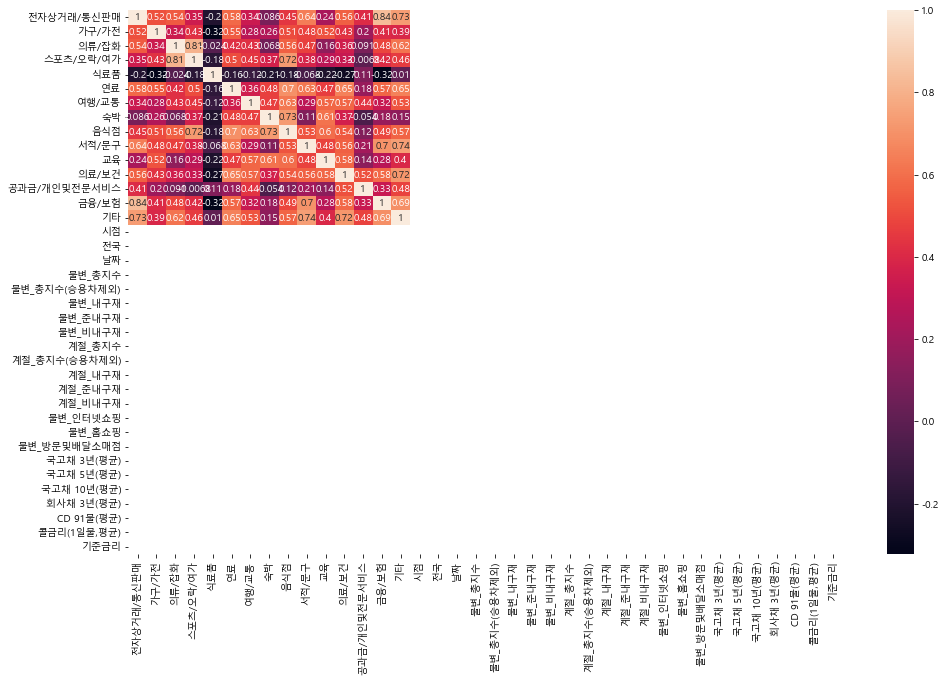

In [58]:
# 상관계수 히트맵

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(16,10))

sns.heatmap(df.corr(), annot=True)

plt.show()

### 정규성 검정

In [579]:
from scipy import stats
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

In [580]:
shap_pct(df)

전자상거래/통신판매 의 pvalue: 0.3626576364040375
가구/가전 의 pvalue: 0.022236622869968414
의류/잡화 의 pvalue: 0.00010477489558979869
스포츠/오락/여가 의 pvalue: 2.4413393475697376e-06
식료품 의 pvalue: 0.055363979190588
연료 의 pvalue: 0.35671818256378174
여행/교통 의 pvalue: 1.2970687066626851e-06
숙박 의 pvalue: 0.6088739037513733
음식점 의 pvalue: 0.3199599087238312
서적/문구 의 pvalue: 1.719180318104918e-07
교육 의 pvalue: 0.007144332863390446
의료/보건 의 pvalue: 0.27751925587654114
공과금/개인및전문서비스 의 pvalue: 0.042796824127435684
금융/보험 의 pvalue: 0.0006722407415509224
기타 의 pvalue: 0.5472776293754578
소비자물가지수 의 pvalue: 0.6630126237869263
소매판매지수 의 pvalue: 0.8067617416381836
국고채 3년(평균) 의 pvalue: 0.005460984073579311
국고채 5년(평균) 의 pvalue: 0.0008722806232981384
국고채 10년(평균) 의 pvalue: 0.013943984173238277
회사채 3년(평균) 의 pvalue: 6.666248373221606e-05
CD 91물(평균) 의 pvalue: 2.629176343305062e-08
콜금리(1일물,평균) 의 pvalue: 2.3542233158584114e-13
기준금리 의 pvalue: 3.2682447805271346e-18


In [581]:
# 정규성 히스토그램
from matplotlib.pyplot import imread

image = imread('./data/dajopay_subplot.png')

fig, axes = plt.subplots(3, 5)
fig.set_size_inches((20,15))

sns.distplot(df["전자상거래/통신판매"], ax=axes[0,0])
sns.distplot(df["가구/가전"], ax=axes[0,1])
sns.distplot(df["의류/잡화"], ax=axes[0,2])
sns.distplot(df["스포츠/오락/여가"], ax=axes[0,3])
sns.distplot(df["식료품"], ax=axes[0,4])
sns.distplot(df["연료"], ax=axes[1,0])
sns.distplot(df["여행/교통"], ax=axes[1,1])
sns.distplot(df["숙박"], ax=axes[1,2])
sns.distplot(df["음식점"], ax=axes[1,3])
sns.distplot(df["서적/문구"], ax=axes[1,4])
sns.distplot(df["교육"], ax=axes[2,0])
sns.distplot(df["의료/보건"], ax=axes[2,1])
sns.distplot(df["공과금/개인및전문서비스"], ax=axes[2,2])
sns.distplot(df["금융/보험"], ax=axes[2,3])
axes[2,4].imshow(image)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/dajopay_subplot.png'

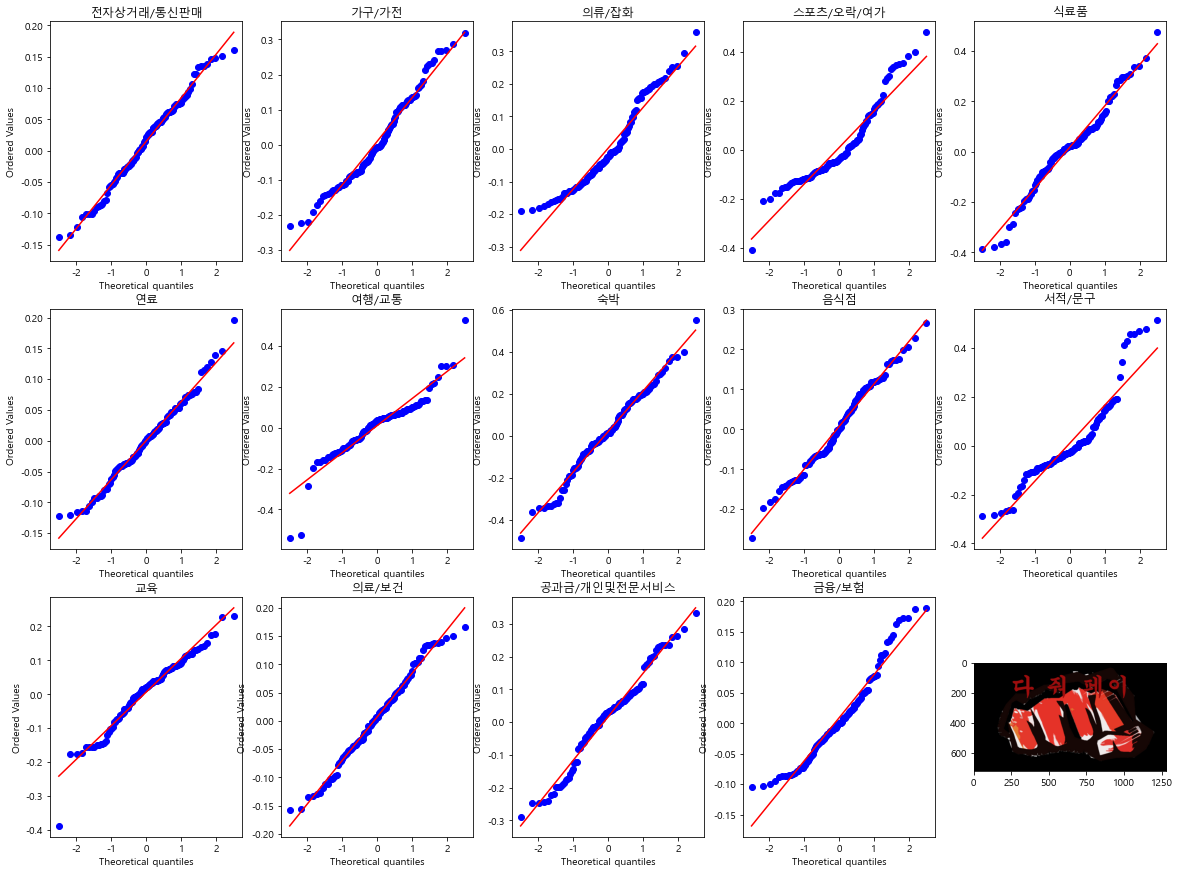

In [ ]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread

image = imread('./data/dajopay_subplot.png')

fig, axes = plt.subplots(3, 5)
fig.set_size_inches((20,15))

stats.probplot(df["전자상거래/통신판매"], dist=stats.norm, plot=axes[0,0])
axes[0,0].title.set_text("전자상거래/통신판매")
stats.probplot(df["가구/가전"], dist=stats.norm, plot=axes[0,1])
axes[0,1].title.set_text("가구/가전")
stats.probplot(df["의류/잡화"], dist=stats.norm, plot=axes[0,2])
axes[0,2].title.set_text("의류/잡화")
stats.probplot(df["스포츠/오락/여가"], dist=stats.norm, plot=axes[0,3])
axes[0,3].title.set_text("스포츠/오락/여가")
stats.probplot(df["식료품"], dist=stats.norm, plot=axes[0,4])
axes[0,4].title.set_text("식료품")
stats.probplot(df["연료"], dist=stats.norm, plot=axes[1,0])
axes[1,0].title.set_text("연료")
stats.probplot(df["여행/교통"], dist=stats.norm, plot=axes[1,1])
axes[1,1].title.set_text("여행/교통")
stats.probplot(df["숙박"], dist=stats.norm, plot=axes[1,2])
axes[1,2].title.set_text("숙박")
stats.probplot(df["음식점"], dist=stats.norm, plot=axes[1,3])
axes[1,3].title.set_text("음식점")
stats.probplot(df["서적/문구"], dist=stats.norm, plot=axes[1,4])
axes[1,4].title.set_text("서적/문구")
stats.probplot(df["교육"], dist=stats.norm, plot=axes[2,0])
axes[2,0].title.set_text("교육")
stats.probplot(df["의료/보건"], dist=stats.norm, plot=axes[2,1])
axes[2,1].title.set_text("의료/보건")
stats.probplot(df["공과금/개인및전문서비스"], dist=stats.norm, plot=axes[2,2])
axes[2,2].title.set_text("공과금/개인및전문서비스")
stats.probplot(df["금융/보험"], dist=stats.norm, plot=axes[2,3])
axes[2,3].title.set_text("금융/보험")
axes[2,4].imshow(image)

plt.show()

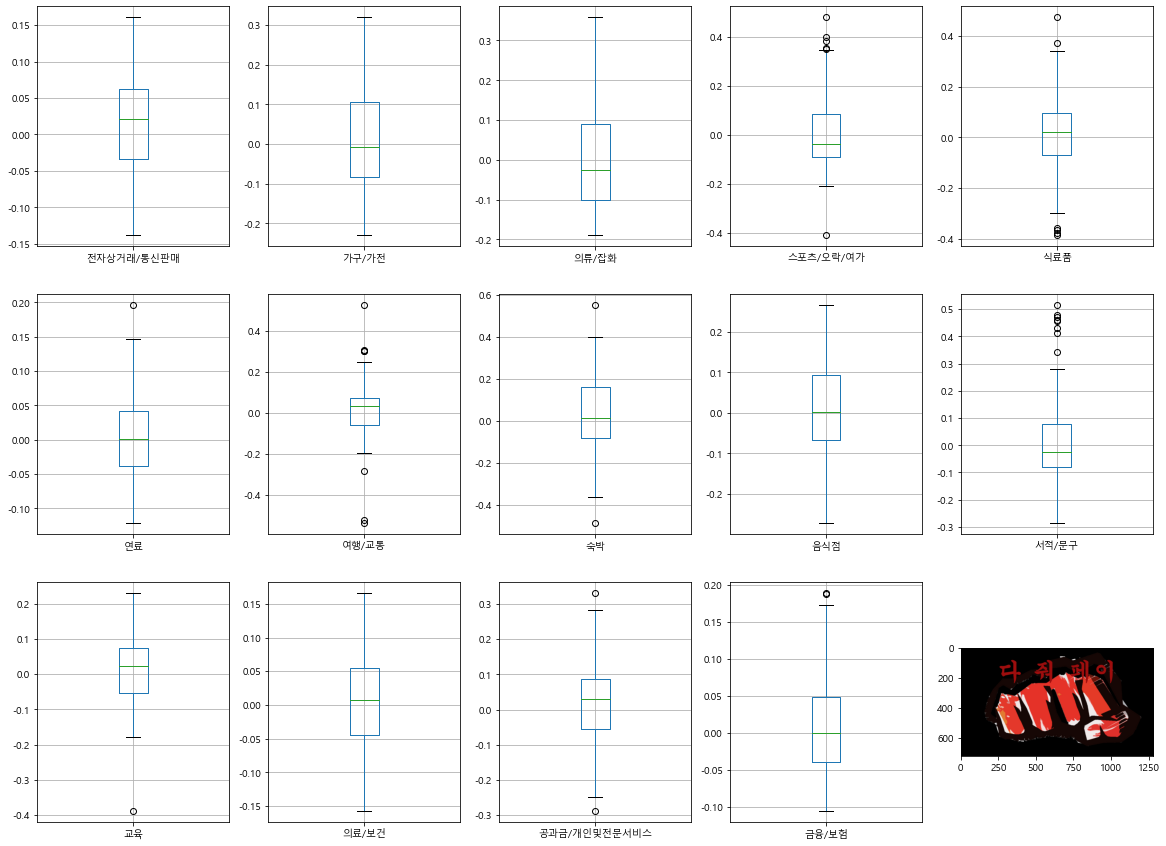

In [ ]:
# 이상치 박스플롯
from matplotlib.pyplot import imread

image = imread('./data/dajopay_subplot.png')

fig, axes = plt.subplots(3, 5)
fig.set_size_inches((20,15))

df.boxplot(column="전자상거래/통신판매", ax=axes[0,0])
df.boxplot(column="가구/가전", ax=axes[0,1])
df.boxplot(column="의류/잡화", ax=axes[0,2])
df.boxplot(column="스포츠/오락/여가", ax=axes[0,3])
df.boxplot(column="식료품", ax=axes[0,4])
df.boxplot(column="연료", ax=axes[1,0])
df.boxplot(column="여행/교통", ax=axes[1,1])
df.boxplot(column="숙박", ax=axes[1,2])
df.boxplot(column="음식점", ax=axes[1,3])
df.boxplot(column="서적/문구", ax=axes[1,4])
df.boxplot(column="교육", ax=axes[2,0])
df.boxplot(column="의료/보건", ax=axes[2,1])
df.boxplot(column="공과금/개인및전문서비스", ax=axes[2,2])
df.boxplot(column="금융/보험", ax=axes[2,3])
axes[2,4].imshow(image)

plt.show()

In [582]:
# csv로 저장
df.to_csv('./data/card_indexes.csv')